In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve,average_precision_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

dataa = pd.read_csv('creditcard_2023.csv')


In [7]:

dataa = dataa.drop(columns=['id'])
X = dataa.drop(columns=['Class'])  # Features: V1-V28, Amount
y = dataa['Class']  # Target: class
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [8]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     85149
           1       0.98      0.95      0.97     85440

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589

ROC AUC Score: 0.9934683620303304


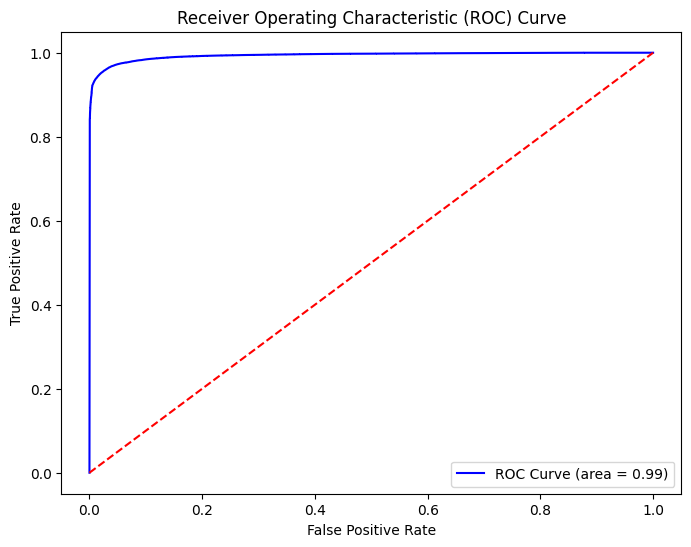

In [9]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

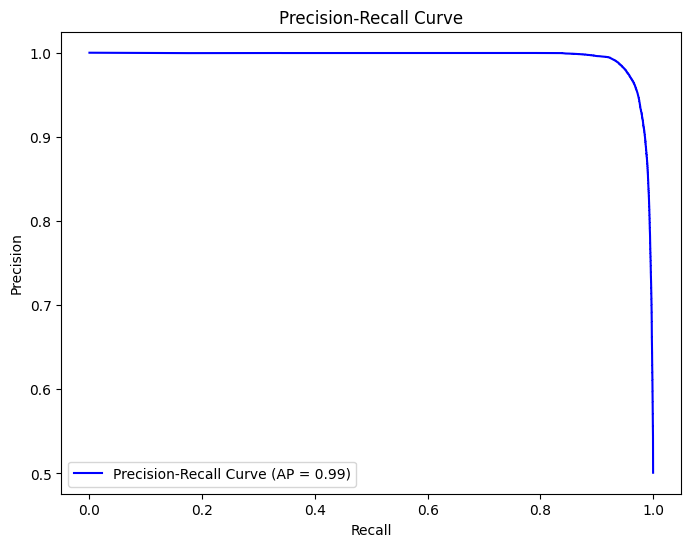

In [12]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

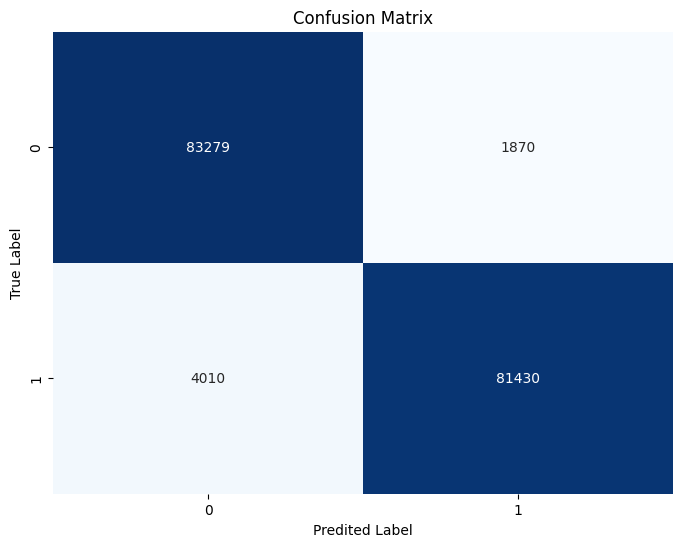

In [28]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predited Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# testing the model we made
data = pd.read_csv('creditcard_2023.csv')

if 'id' in data.columns:
    data = data.drop(columns=['id'])
# We'll take the first transaction from the dataset for testing
example_transaction = data.drop(columns=['Class']).iloc[0]  
example_transaction = np.array(example_transaction).reshape(1, -1)
scaler = StandardScaler()
scaler.fit(data.drop(columns=['Class']))  
example_transaction_scaled = scaler.transform(example_transaction)
predicted_class = model.predict(example_transaction_scaled)
predicted_prob = model.predict_proba(example_transaction_scaled)[:, 1]

print(f"Predicted Class: {predicted_class[0]}")  # 0 for non-fraudulent, 1 for fraudulent
print(f"Probability of being fraudulent: {predicted_prob[0]:.4f}")


Predicted Class: 0
Probability of being fraudulent: 0.0724


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [32]:
import numpy as np

# we AS a team ARE Manually create a sample transaction with features V1 to V28 and Amount
sample_transaction = np.array([
    -1.359807,  # V1
    -0.072781,  # V2
    2.536346,   # V3
    1.378155,   # V4
    -0.338321,  # V5
    0.462388,   # V6
    0.239599,   # V7
    0.098698,   # V8
    0.363787,   # V9
    0.090794,   # V10
    -0.551600,  # V11
    -0.617801,  # V12
    -0.991390,  # V13
    -0.311169,  # V14
    1.468177,   # V15
    -0.470401,  # V16
    0.207971,   # V17
    0.025791,   # V18
    0.403993,   # V19
    0.251412,   # V20
    -0.018307,  # V21
    0.277838,   # V22
    -0.110474,  # V23
    0.066928,   # V24
    0.128539,   # V25
    -0.189115,  # V26
    0.133558,   # V27
    -0.021053,  # V28
    149.62      # Amount
]).reshape(1, -1)  # RESHAPING to fit the model's expected input


sample_transaction_scaled = scaler.transform(sample_transaction)
predicted_class = model.predict(sample_transaction_scaled)
predicted_prob = model.predict_proba(sample_transaction_scaled)[:, 1]
print(f"Predicted Class: {predicted_class[0]}")  # 0 for non-fraudulent, 1 for fraudulent
print(f"Probability of being fraudulent: {predicted_prob[0]:.4f}")


Predicted Class: 1
Probability of being fraudulent: 1.0000


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:
from sklearn.metrics import accuracy_score
#PREINTING accuracy for final satisfaction 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.97


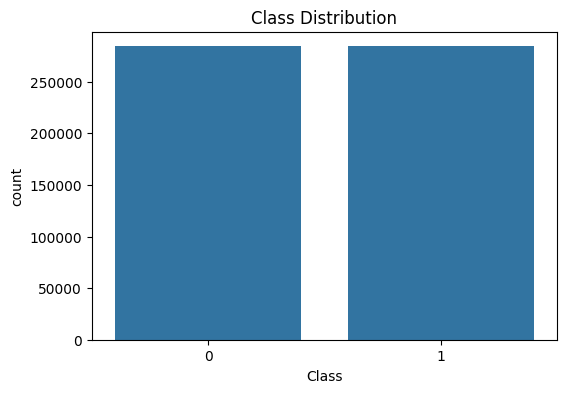

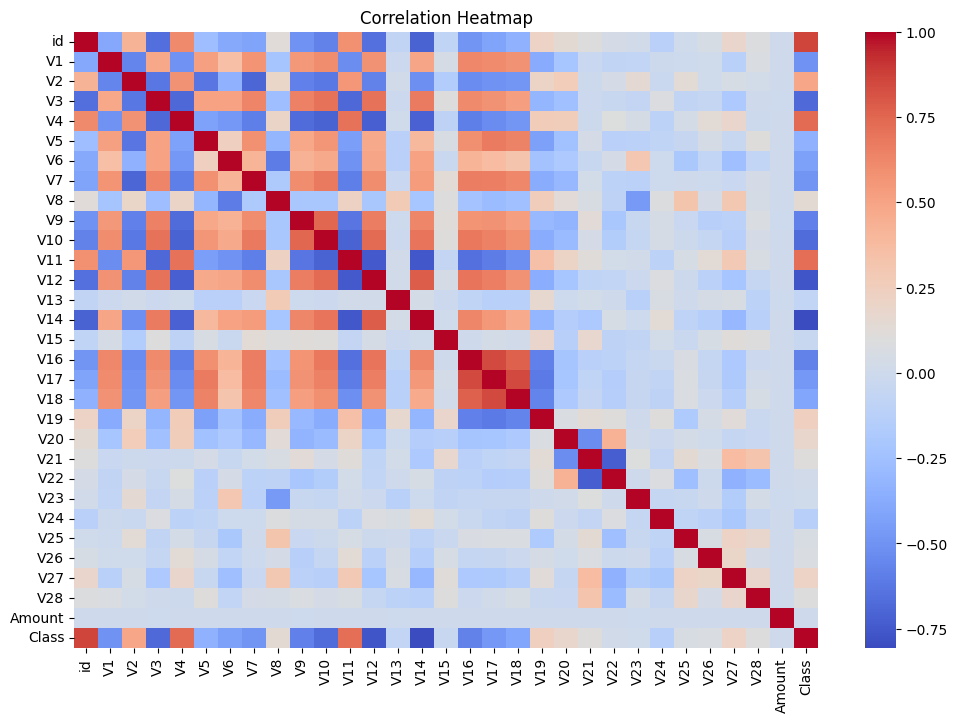

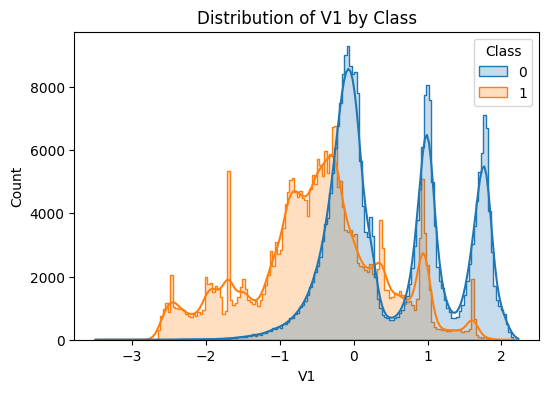

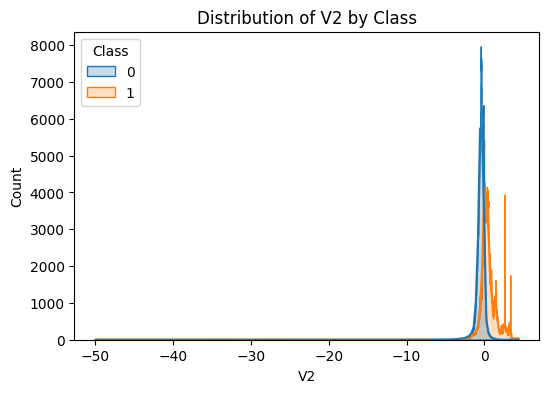

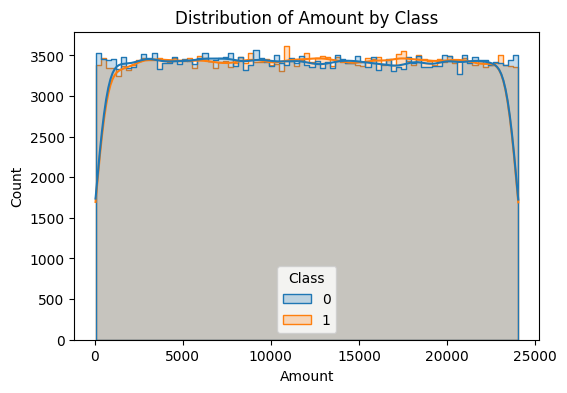

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('creditcard_2023.csv')

# 1. Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(12,8))
corr = data.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 3. Feature Distributions
features = ['V1', 'V2', 'Amount']  # Example feature names
for feature in features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=data, x=feature, hue='Class', kde=True, element='step')
    plt.title(f'Distribution of {feature} by Class')
    plt.show()



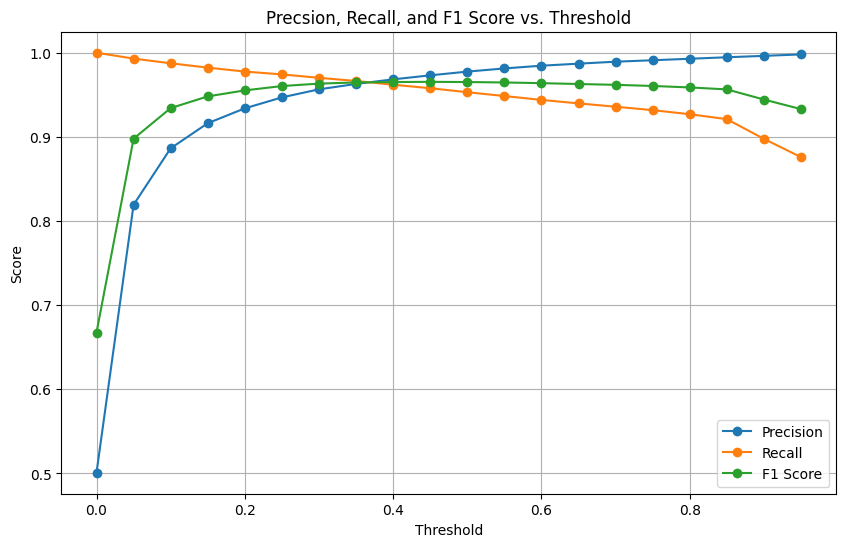

Best threhold based on F1 Score: 0.45


In [35]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.0, 1.0, 0.05)
precisions = []
recalls = []
f1_scores = []
for threshold in thresholds:
    y_pred_adj = (y_pred_prob >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred_adj))
    recalls.append(recall_score(y_test, y_pred_adj))
    f1_scores.append(f1_score(y_test, y_pred_adj))
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.plot(thresholds, f1_scores, label='F1 Score', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precsion, Recall, and F1 Score vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()
# Choose the threshold that best meets our _requirements(maximizing F1 Score)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f'Best threhold based on F1 Score: {best_threshold}')
